# Group 3

## Choosing the data set

We decided to work with a higher-resolution dataset to better understand how to handle images of varying sizes, bringing us closer to real-world scenarios. At the same time, we aim to focus on the learning process rather than grading outcomes, balancing both perspectives.

While the lower-resolution CIFAR-10 dataset requires less computational power and shorter training times, dataset #2 demands a more complex architecture.

As a team, we voted to prioritize gaining as much experience as possible with real-world challenges and chose dataset #2. We particularly anticipate learning new skills in data processing, coding, and CNN preprocessing, which will significantly enhance our expertise.

## Data preprocessing

Load libraries

In [18]:
import pandas as pd
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
# from torchinfo import summary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Load the data set & analyze the data set

In [ ]:
# from google.colab import files
# files.upload()

{}

In [3]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 96% 563M/586M [00:02<00:00, 270MB/s]
100% 586M/586M [00:02<00:00, 240MB/s]


In [5]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile("animals10.zip", 'r') as zip_ref:
    zip_ref.extractall("animals10")

In [6]:
import os
from PIL import Image

# Define the dataset path
dataset_path = "animals10/raw-img/"

# List categories
categories = os.listdir(dataset_path)
print("Categories:", categories)

# Load and display a sample image
sample_category = categories[0]
sample_image_path = os.path.join(dataset_path, sample_category, os.listdir(os.path.join(dataset_path, sample_category))[0])

image = Image.open(sample_image_path)
image.show()

Categories: ['cavallo', 'gatto', 'farfalla', 'ragno', 'gallina', 'scoiattolo', 'pecora', 'elefante', 'cane', 'mucca']


In [7]:
# Define the dataset path
dataset_path = "animals10/raw-img/"

# Dictionary for Italian-to-English translation
translation_dict = {
    'cavallo': 'horse',
    'gatto': 'cat',
    'farfalla': 'butterfly',
    'ragno': 'spider',
    'gallina': 'chicken',
    'scoiattolo': 'squirrel',
    'pecora': 'sheep',
    'elefante': 'elephant',
    'cane': 'dog',
    'mucca': 'cow'
}

# Rename the folders
for italian_name, english_name in translation_dict.items():
    original_path = os.path.join(dataset_path, italian_name)
    new_path = os.path.join(dataset_path, english_name)

    if os.path.exists(original_path):
        os.rename(original_path, new_path)
        print(f"Renamed: {italian_name} -> {english_name}")
    else:
        print(f"Folder not found: {italian_name}")


Renamed: cavallo -> horse
Renamed: gatto -> cat
Renamed: farfalla -> butterfly
Renamed: ragno -> spider
Renamed: gallina -> chicken
Renamed: scoiattolo -> squirrel
Renamed: pecora -> sheep
Renamed: elefante -> elephant
Renamed: cane -> dog
Renamed: mucca -> cow


In [10]:
from keras.preprocessing import image_dataset_from_directory

dataset= image_dataset_from_directory(
    'animals10/raw-img',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=None,
    image_size=(256, 256),
    shuffle=True,
    seed=99,
)

Found 26179 files belonging to 10 classes.


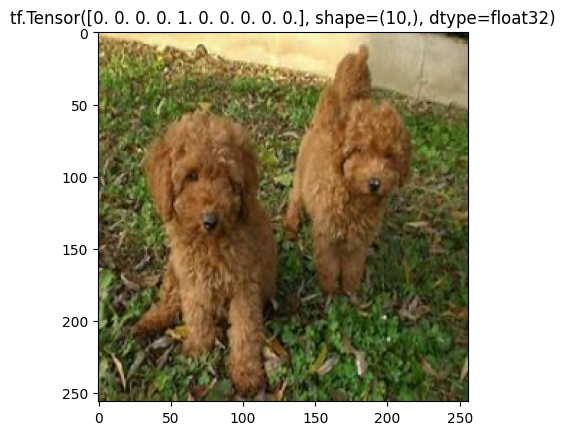

In [17]:
import matplotlib.pyplot as plt

# print a random image
image, label= next(iter(dataset.take(1)))
image_np = image.numpy().astype('uint8')
plt.imshow(image_np)
plt.axis('on')
plt.title(label)
plt.show()

In [20]:
# Initialize lists to store image data and labels
image_data = []
labels = []

# Iterate through the dataset
for image, label in dataset:
    image_data.append(image.numpy())  # Convert image tensor to NumPy array
    labels.append(label.numpy())  # Convert label tensor to NumPy array

print(labels)

[array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 

In [22]:
# Convert the lists into a DataFrame
data = {
    'image': image_data,
    'label': [np.argmax(label) for label in labels]  # Convert one-hot encoded labels to class indices
}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,image,label
0,"[[[190.74219, 190.74219, 192.74219], [186.9687...",8
1,"[[[145.03836, 177.03836, 101.03836], [137.3590...",2
2,"[[[6.359375, 45.703125, 5.2421875], [78.38281,...",7
3,"[[[70.91406, 78.91406, 65.91406], [69.484375, ...",3
4,"[[[45.914062, 53.914062, 40.914062], [45.0, 52...",4


In [23]:

# Iterate through the dataset
for image, label in dataset:
    image_data.append(image.numpy())  # Convert image tensor to NumPy array
    labels.append(label.numpy())  # Convert label tensor to NumPy array

# Convert the lists into a DataFrame
data = {
    'image': image_data,
    'label': [np.argmax(label) for label in labels]  # Convert one-hot encoded labels to class indices
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

# Optional: Save the DataFrame for later use
df.to_pickle("dataset.pkl")

                                               image  label
0  [[[190.74219, 190.74219, 192.74219], [186.9687...      8
1  [[[145.03836, 177.03836, 101.03836], [137.3590...      2
2  [[[6.359375, 45.703125, 5.2421875], [78.38281,...      7
3  [[[70.91406, 78.91406, 65.91406], [69.484375, ...      3
4  [[[45.914062, 53.914062, 40.914062], [45.0, 52...      4


In [24]:
dataset.pkl.shape()

AttributeError: '_PrefetchDataset' object has no attribute 'pkl'